In [2]:
import os
import tensorflow as tf
# config = tf.ConfigProto(allow_soft_placement=True)
# config.gpu_options.allocator_type = 'BFC'
# config.gpu_options.per_process_gpu_memory_fraction = 0.40

/home/dl1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# !pip install tensorflow-gpu==1.5.0
# from keras.optimizers import SGD

In [4]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

#Specifying the GPUs for use:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"

# from tensorflow.python.client import device_lib
# print (device_lib.list_local_devices())

In [5]:
# -*- coding: utf-8 -*-
"""
@author: Aravindhan Poopathy
"""

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import glob
from PIL import Image
import cv2
from keras.utils import to_categorical
import matplotlib.image as mpimg
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


In [6]:
#reading the files from the input directories:

input_dir_coats    = '/home/dl1/fashionCNN/deepfashion/coats&jackets/'
input_dir_sweaters = '/home/dl1/fashionCNN/deepfashion/sweaters/'
input_dir_teescasuals = '/home/dl1/fashionCNN/deepfashion/tees&casuals/'
input_dir_shirts   ='/home/dl1/fashionCNN/deepfashion/shirt/'


In [7]:
#file path creation and labelling

path_list = []

for i,filec in enumerate(os.listdir(input_dir_coats)):
    path_list.append(os.path.join(input_dir_coats, filec))
i+=1
coatslabel = [0] * i

print(len(coatslabel))

for i,files in enumerate(os.listdir(input_dir_sweaters)):
    path_list.append(os.path.join(input_dir_sweaters, files))
i+=1
sweaterlabel = [1] * i

print(len(sweaterlabel))


for i,filet in enumerate(os.listdir(input_dir_teescasuals)):
    path_list.append(os.path.join(input_dir_teescasuals, filet))
i+=1
teeslabel = [2] * i

print(len(teeslabel))

for i,filesh in enumerate(os.listdir(input_dir_shirts)):
    path_list.append(os.path.join(input_dir_shirts, filesh))
i+=1
shirtlabel = [3] * i

print(len(shirtlabel))


1310
1090
762
1457


In [8]:
#input label
labels = coatslabel + sweaterlabel + teeslabel  + shirtlabel
# input_labels
labarr=np.asarray(labels)
len(labarr)

4619

In [9]:
# ima = cv2.imread("/home/dl1/fashionCNN/deepfashion/coats&jackets/1.jpg")
# print(type(ima))
# # cv2.imshow('image',ima)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [10]:
#reading the input data and resizing it as the data scrapped from different websites will in different sizes

input_data = []

for img in path_list:
    image = Image.open(img).convert('RGB')
#     sqrWidth = np.ceil(np.sqrt(image.size[0]*image.size[1])).astype(int)
#     new_image = image.resize((sqrWidth,sqrWidth))
    new_image = image.resize((224,224))
#converting it to numpy array as Image List type cannot be converted to an array    
    final_image = np.array(new_image)
    input_data.append(final_image)

type(input_data)

list

In [11]:
in_data=np.asarray(input_data)
in_data.shape

(4619, 224, 224, 3)

In [12]:
#shufflig the data and the label equally for eleminating overfitting

arr = np.arange(len(labarr))
np.random.shuffle(arr)
data = in_data[arr]
labarr = labarr[arr]


In [13]:
#Train and Test split

X_train, X_test, label_train, label_test = train_test_split(data, labarr, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(3695, 224, 224, 3)
(924, 224, 224, 3)


In [14]:
# Find the unique numbers from the train labels
classes = np.unique(label_train)
nClasses = len(classes)
print('Output classes : ', classes)
print('Total number of outputs : ', nClasses)

Output classes :  [0 1 2 3]
Total number of outputs :  4


In [15]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
train_data = X_train.reshape(X_train.shape[0], nRows, nCols, nDims)
test_data = X_test.reshape(X_test.shape[0], nRows, nCols, nDims)
print('Training data shape : ', X_train.shape, label_train.shape)

print('Testing data shape : ', X_test.shape, label_test.shape)
input_shape = (nRows, nCols, nDims)

Training data shape :  (3695, 224, 224, 3) (3695,)
Testing data shape :  (924, 224, 224, 3) (924,)


In [16]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(label_train,nClasses)
test_labels_one_hot = to_categorical(label_test,nClasses)

In [17]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', label_train[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  3
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1.]


In [23]:
#Model creation:

#General Model

def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model

model1 = createModel()
batch_size = 50
epochs = 40

In [25]:
# #Data Augumentation
datagen = ImageDataGenerator(horizontal_flip=True,
          rotation_range=10.0,
          zoom_range = 0.2,  
           fill_mode = "nearest")

In [26]:
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
__________

In [27]:
#fit With data Augumentation:
trainedModel = model1.fit_generator(datagen.flow(train_data, train_labels_one_hot,
           batch_size=batch_size),
          epochs=epochs,
          verbose=1,
          validation_data=(test_data, test_labels_one_hot))

Epoch 1/40
74/74 [==============================] - 26s 349ms/step - loss: 1.5217 - acc: 0.3380 - val_loss: 1.3326 - val_acc: 0.4242
Epoch 2/40
74/74 [==============================] - 26s 350ms/step - loss: 1.3230 - acc: 0.4044 - val_loss: 1.3150 - val_acc: 0.3918
Epoch 3/40
74/74 [==============================] - 26s 349ms/step - loss: 1.2692 - acc: 0.4410 - val_loss: 1.2120 - val_acc: 0.4632
Epoch 4/40
74/74 [==============================] - 26s 348ms/step - loss: 1.2538 - acc: 0.4626 - val_loss: 1.1799 - val_acc: 0.4816
Epoch 5/40
74/74 [==============================] - 25s 332ms/step - loss: 1.1893 - acc: 0.4874 - val_loss: 1.1508 - val_acc: 0.5141
Epoch 6/40
74/74 [==============================] - 29s 390ms/step - loss: 1.1548 - acc: 0.5101 - val_loss: 1.2151 - val_acc: 0.4848
Epoch 7/40
74/74 [==============================] - 31s 415ms/step - loss: 1.1290 - acc: 0.5205 - val_loss: 1.2358 - val_acc: 0.4773
Epoch 8/40
74/74 [==============================] - 31s 418ms/step - 

In [28]:
#fit without data augmentation:
# model1.fit(train_data, train_labels_one_hot,
#            batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(test_data, test_labels_one_hot))

In [29]:
model1.evaluate(test_data, test_labels_one_hot)

924/924 [==============================] - 2s 2ms/step


[0.8182583069388485, 0.6645021645021645]

Text(0.5,1,'Loss Curves')

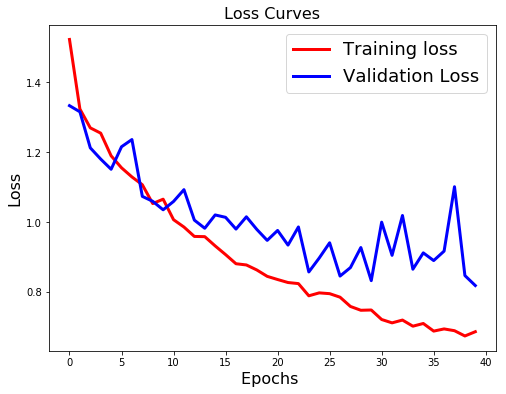

In [30]:
#Training Loss and Validation Loss
plt.figure(figsize=[8,6])
plt.plot(trainedModel.history['loss'],'r',linewidth=3.0)
plt.plot(trainedModel.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

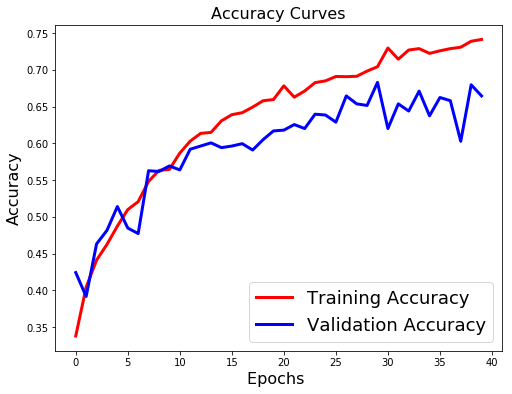

In [31]:
#Training Accuracy and Validation Accuracy
plt.figure(figsize=[8,6])
plt.plot(trainedModel.history['acc'],'r',linewidth=3.0)
plt.plot(trainedModel.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [32]:
#Testing the mdoel (prediction)
# test = [] 
# test_file = '/home/dl1/fashionCNN/21601_khakikhaki_1.jpg'
# testImage = Image.open(img).convert('RGB')
# testImage = testImage.resize((224,224))
# testImage = np.array(testImage)
# test.append(testImage)
# test_in = np.asarray(test)
# test_in.astype('float32')
# test_in/255
# test_in.shape

image = Image.open('/home/dl1/fashionCNN/TestData/1. 83907-232839-large.jpg')
new_image = image.resize((224,224))
new_image.save('/home/dl1/fashionCNN/1. 83907-232839-large.jpg')



test_file = '/home/dl1/fashionCNN/1. 83907-232839-large.jpg'
test_img = cv2.imread(test_file)
test=np.asarray(test_img)


test_img.astype('float32')
test_img/255
test_img=np.expand_dims(test_img,axis=0)
test_img.shape

(1, 224, 224, 3)

In [39]:
pred1 = model1.predict(test_img)
# pred = model1.predict_classes(test_img)
# pred.ravel()
pred1.ravel()

array([0., 0., 0., 1.], dtype=float32)

In [21]:
#save model
model1.save('/home/dl1/fashionCNN/savedModel/basicModel3')

In [34]:
#load model
loaded_model = load_model('/home/dl1/fashionCNN/savedModel/basicModel1')

In [40]:
# pred = loaded_model.predict_classes(test_img)
pred = loaded_model.predict(test_img)
pred.ravel()

array([0.000000e+00, 6.336383e-33, 0.000000e+00, 1.000000e+00],
      dtype=float32)